# Regressão Logística - Regularizada

In [47]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import Image
%matplotlib inline

In [2]:
data = pd.read_csv('ex2data2.txt', header = None, names = ['score1', 'score2', 'approved'])
data.head()

,score1,score2,approved
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
#Normalizing
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
dataValuesNormalized = normalizer.fit_transform( data.drop('approved', axis = 1).values )
dataNormalized = pd.DataFrame( dataValuesNormalized, columns = ['test1', 'test2'] )
dataNormalized['approved'] = data['approved']

print('Dados Normalizados:')
dataNormalized.head()

Dados Normalizados:


,test1,test2,approved
0,0.073089,0.997325,1
1,-0.134177,0.990957,1
2,-0.294981,0.955503,1
3,-0.598321,0.801256,1
4,-0.740623,0.671921,1


## Gráfico

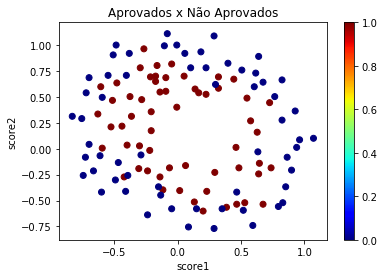

In [4]:
#Data plotting
plt.scatter(x = data['score1'], y = data['score2'], 
            c = data['approved'], cmap = plt.get_cmap('jet'))
cbar = plt.colorbar()
plt.xlabel('score1')
plt.ylabel('score2')
plt.title('Aprovados x Não Aprovados')

## Considerando a essência linear da Regressão Logística, não é possível desenvolver um modelo linear que possa classificar corretamente os dados apresentados. No entanto, é possível estender o modelo de forma que represente a relação não linear, tal como criando outras variáveis de grau maior.

In [5]:
## Mapping features
from sklearn.preprocessing import PolynomialFeatures
polyFeatures = PolynomialFeatures(30)

dataPolynomial = polyFeatures.fit_transform(dataValuesNormalized)

In [6]:
from sklearn.linear_model import SGDClassifier

eta = 0.01
epochs = 1000

reg_values = [0, 0.01, 0.25]
modelsByRegValue = [ SGDClassifier( loss='log', penalty='l2', alpha=reg, learning_rate='constant', eta0=eta, n_iter=epochs, random_state=2 ) for reg in reg_values]

In [7]:
trainedModel = [ model.fit(dataPolynomial, data['approved'].values) for model in modelsByRegValue ]

In [8]:
thetas = [ np.array([model.intercept_, model.coef_[0]]).flatten() for model in trainedModel ]
thetas = [ np.hstack(theta) for theta in thetas ]

### Superfícies de decisão

In [9]:
# Predict function
def predict(X, theta):
    linear = theta[0] + np.dot(X, theta[1:])
    return float(1) / ( 1 + math.exp(-linear) )

In [73]:
def plot(theta, length):
    u = np.linspace(-1, 1.5, length)
    v = np.linspace(-1, 1.5, length)
    
    z = np.zeros((len(u), len(v)))
    valuesWithOnes = np.ones((1, length))    
    
    thetaAltered = theta.reshape(length, 1)
    
    for i in range(0, len(u)):
        for j in range(0, len(v)):
            vals = np.array([u[i], v[j]]).reshape(1,-1)
            values = polyFeatures.fit_transform(vals)[0,:length-1]
            valuesWithOnes[:,1:] = values
                        
            z[i,j] =  np.dot(valuesWithOnes,thetaAltered)

#     dataPolynomialAltered = dataPolynomial[:length, :length]
#     predictsAltered = predicts.reshape(1,-1)
#     predictsAltered = np.array([predicts,]*length)
    z = np.transpose(z)
    
#     print(dataPolynomialAltered.shape)
#     print(predictsAltered.shape)
#     print(z.shape)    
    
    plt.contour(u, v, z)
    
    #Data plotting
#     plt.scatter(x = data['score1'], y = data['score2'], 
#                 c = data['approved'], cmap = plt.get_cmap('jet'))
#     cbar = plt.colorbar()
#     plt.xlabel('score1')
#     plt.ylabel('score2')
#     plt.title('Aprovados x Não Aprovados')
#     plt.plot(data['score1'], predicts, '--')

## Com regularização igual a 0.0

<img src="lambda0.png">

## Com regularização igual a 0.01

<img src="lambda1.png">

## Com regularização igual a 0.25

<img src="lambda2.png">

Sempre que uma função fica cada vez mais complexa, como o aumento de variáveis e o grau polinomial, temos uma
variância maior, pois a função começa a se comportar e modificar-se conforme o dataset apresentado, fazendo com que
se adapter àqueles dados específicos. Do contrário, o bias tende a diminuir, pois a ideia é que se consiga
representar "a realidade", ou seja, o erro em relação ao que se espera, de real, seja minimizado.
O que acontece com uma função linear, a mais simples, por exemplo, tem alto bias e baixa variância. 
Nos gráficos acima, com a regularização em 0, tivemos que a superfície de decisão se adaptou corretamente
aos dados passados. Significa que, com o grau polinomial sem alteração/função sem alteração, tivemos uma alta
adaptação, o que pode representar alta variação, dado que se apresentar outro conjunto de dados, essa mesma função
tende a se adaptar perfeitamente também. No entanto, representa um bias baixo, refletindo que o erro em relação 
ao real pode ser baixo. A mesma ideia segue para as outras imagens.